In [76]:
import os, struct
import math, random, copy
import numpy as np
import sys
from scipy import misc
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd
import mnist
import scipy.misc

### Step 1 - Flipping images

/Users/poonl/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/Users/poonl/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


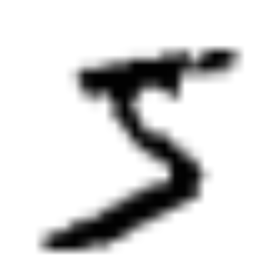

In [77]:
images = mnist.train_images()
scipy.misc.toimage(scipy.misc.imresize(images[0,:,:] * -1 + 256, 10.))


In [78]:
im_of_20 = np.zeros((20, 28, 28))

In [79]:
im_of_20_flip = np.zeros((20, 28, 28))

In [80]:
for i in range(20): #get the first 20 images to work with
    im_of_20[i,:,:] = images[i,:,:]
    
im_of_20_map = np.where(im_of_20 < 128.0 ,-1,1)

### Step 2 - Adding noises to images

In [81]:
noise_df = np.loadtxt("NoiseCoordinates.csv", delimiter= ',',  usecols=range(1,16), skiprows=1)

In [82]:
im_of_20_flip =  copy.deepcopy(im_of_20_map)

In [83]:
for i in range(20):
    for j in range(15):
        row = int(noise_df[i*2,j])
        col = int(noise_df[i*2+1,j])
        if im_of_20_flip[i, row, col] == 1:
            im_of_20_flip[i, row, col] = -1
        else:
            im_of_20_flip[i, row, col] = 1

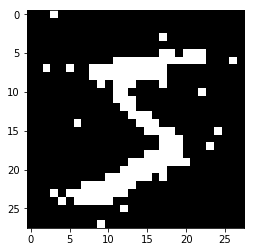

In [84]:
plt.imshow(im_of_20_flip[0].astype(np.float64),cmap='gray')
plt.show()


### Step 3 - Denoising with Mean Field Inference

In [85]:
import copy

In [86]:
initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',') # 28x28
update_df = np.loadtxt("UpdateOrderCoordinates.csv", delimiter= ',', usecols=range(1,785), skiprows=1)

In [87]:
for i in range(10):
    for img in range(20):
        for idx in range(784): 
            row_num = int(update_df[img*2,idx])
            col_num = int(update_df[img*2+1,idx])
            first_sum = 0 
            sec_sum = 0 
            third_sum = 0
            fourth_sum = 0
            if (row_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num - 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num - 1, col_num])
            if (row_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num + 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num + 1, col_num])
            if (col_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num - 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num - 1])
            if (col_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num + 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num + 1])

            numerator = np.exp(first_sum+sec_sum)
            denominator = numerator + np.exp(third_sum+fourth_sum)

            initial_df[row_num , col_num] = numerator/denominator
    

In [88]:
initial_df

array([[1.36740135e-05, 5.05675318e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05898015e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05654175e-08, 1.50710407e-04, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05897113e-08, 1.50710407e-04, 5.73445842e-08, 3.91657350e-02],
       [5.05675318e-08, 1.86983699e-10, 1.86983669e-10, 1.86983669e-10,
        1.86984002e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86984002e-10, 5.57390150e-07, 1.86984669e-10, 5.57390150e-07,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86984002e-10,
        1.86983669e-10, 1.87073837e-10, 5.57390264e-07, 5.73169

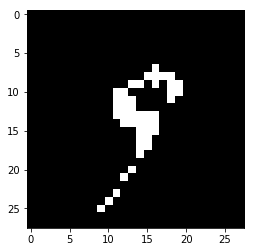

In [89]:
initial_df1 = np.where(initial_df < 0.5 ,-1,1)
plt.imshow(initial_df1.astype(np.float64),cmap='gray')
plt.show()

### Step 4 - Turning in the energy function values computed initially and after each iteration

In [90]:
'''
Helper function to calculate E_q [log P]
'''
def EQLOGP(imgIdx): 
    first_sum = 0 
    sec_sum = 0
    for row in range(28):
        for col in range(28): 
            if col - 1 >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row, col - 1] - 1)
            if col + 1 < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row, col + 1] - 1)
            if row - 1 >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row - 1, col] - 1)
            if row + 1 < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row + 1, col] - 1)
            sec_sum += 2 * (2*initial_df[row, col]-1) * (im_of_20_flip[imgIdx, row , col ]) 
    return first_sum + sec_sum
    

In [91]:
'''
Helper function to calculate E_q [log Q] 
'''
def EQLOGQ(img):
    eqlogq = 0
    for row in range(28):
        for col in range(28):
            eqlogq += initial_df[row, col] * (np.log(initial_df[row, col]) + (1e-10)) + \
                (1-initial_df[row, col])*(np.log(1-initial_df[row, col] + (1e-10)))
    return eqlogq

In [92]:
'''
loading the initial VFE
'''

initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',', dtype = np.float64) # 28x28
energy_list = np.zeros((20,11))
first_sum = 0 
sec_sum = 0 
for imgIdx in range(20):
    first_sum = 0 
    sec_sum = 0 
    for row in range(28):
        for col in range(28): 
            if (col - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1.0) * (2 * initial_df[row, col - 1] - 1.0)
            if (col + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1.0) * (2 * initial_df[row, col + 1] - 1.0)
            if (row - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1.0) * (2 * initial_df[row - 1, col] - 1.0)
            if (row + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1.0) * (2 * initial_df[row + 1, col] - 1.0)
            sec_sum += 2 * (2 * initial_df[row, col] - 1.0) * (im_of_20_flip[imgIdx][row, col])
    
    energy_list[imgIdx,0] = EQLOGQ(imgIdx) - (first_sum + sec_sum)

In [93]:
energy_list

array([[-425.34792871,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [-431.07472978,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [-443.89991751,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [-434.99920689,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [-433.09041963,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [-405.35954595,    0.        ,    0.       

In [94]:
for img in range(20):
    initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',') # 28x28
    for i in range(1,11):
        for idx in range(784): 
            row_num = int(update_df[img*2,idx])
            col_num = int(update_df[img*2+1,idx])
            first_sum = 0 
            sec_sum = 0 
            third_sum = 0
            fourth_sum = 0
            if (row_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
            if (row_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
            if (col_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
            if (col_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
            sec_sum += (2 * im_of_20_flip[img, row_num , col_num])
            fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num])

            numerator = np.exp(first_sum+sec_sum)
            denominator = numerator + np.exp(third_sum+fourth_sum)

            initial_df[row_num , col_num] = numerator/denominator
        energy_list[img, i] = EQLOGQ(img) - EQLOGP(img)

In [95]:
energy_list

array([[ -425.34792871, -3405.66635344, -3557.28707277, -3560.93157354,
        -3560.98732733, -3560.99304488, -3560.9943021 , -3560.99463   ,
        -3560.99471738, -3560.99474071, -3560.99474694],
       [ -431.07472978, -3348.8787683 , -3520.22504612, -3524.50103063,
        -3524.82677041, -3524.8516257 , -3524.85334168, -3524.85346845,
        -3524.85347876, -3524.85347966, -3524.85347975],
       [ -443.89991751, -3431.42714716, -3595.44648817, -3595.65556599,
        -3595.66259274, -3595.66323135, -3595.66330181, -3595.66331007,
        -3595.66331105, -3595.66331117, -3595.66331118],
       [ -434.99920689, -3537.05249981, -3723.41126431, -3723.79864936,
        -3723.79898233, -3723.79898176, -3723.7989818 , -3723.7989818 ,
        -3723.7989818 , -3723.7989818 , -3723.7989818 ],
       [ -433.09041963, -3424.19855832, -3605.58014831, -3606.3603415 ,
        -3606.35658067, -3606.35637885, -3606.35636466, -3606.35636416,
        -3606.35636414, -3606.35636414, -3606.356364

In [96]:
np.savetxt("outputEnergy.csv", energy_list, delimiter=',', fmt='%.12g')

### Step 5 - Displaying the reconstructed images (Image 11 - 19)

In [97]:
a = [] 
for img in range(20):
    initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',',dtype = np.float64) # 28x28
    for i in range(10):
        for idx in range(784): 
            row_num = int(update_df[img*2,idx])
            col_num = int(update_df[img*2+1,idx])
            first_sum = 0 
            sec_sum = 0 
            third_sum = 0
            fourth_sum = 0
            if (row_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
            if (row_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
            if (col_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
            if (col_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                third_sum += -0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
            sec_sum += (2 * im_of_20_flip[img, row_num , col_num])
            fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num])
            
            numerator = np.exp(first_sum+sec_sum)
            denominator = numerator + np.exp(third_sum+fourth_sum)

            initial_df[row_num , col_num] = numerator/denominator
    for row in range(28):
        for col in range(28):
            if (initial_df[row,col] < 0.5):
                im_of_20_flip[img, row , col] = 0
            else: 
                im_of_20_flip[img, row , col] = 1
    a.append(im_of_20_flip[img])

In [98]:
'''
wrtie to file
'''
output_str = '' 
big_img = np.zeros((28, 10*28))
for row in range(28): # height of image
    for img in range(10): # 10 images align
        for col in range(28):
            output_str += str(a[img][row, col]) + ','
            big_img[row,28*img+col] = a[img][row, col]
    output_str = output_str[:-1]
    output_str += '\n'

In [99]:
f= open("output.txt","w+")
f.write(output_str)
f.close()

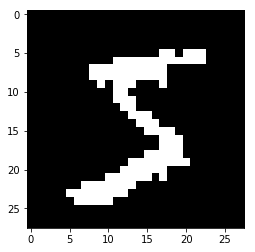

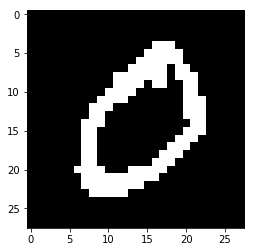

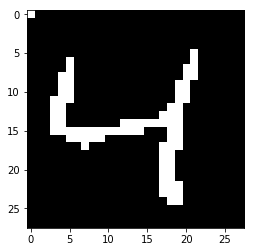

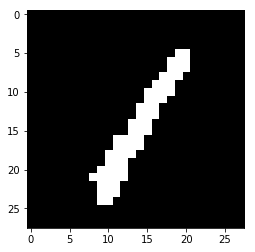

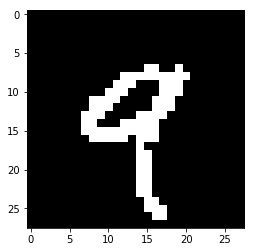

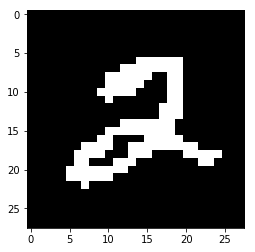

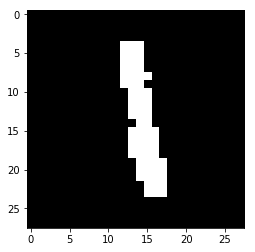

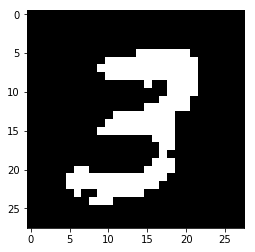

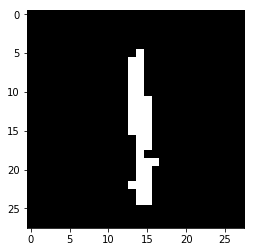

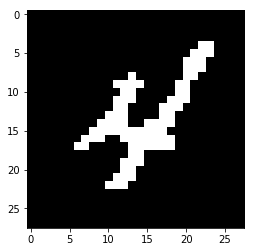

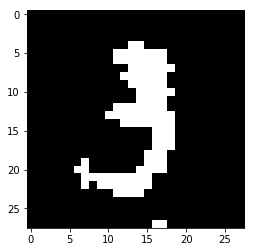

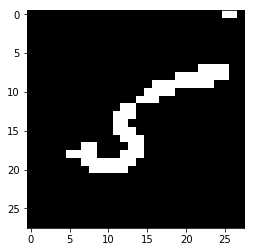

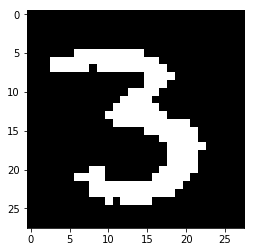

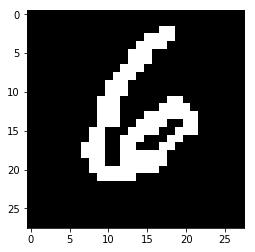

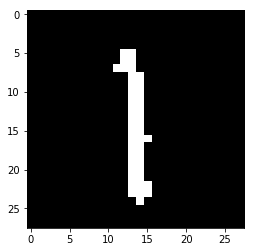

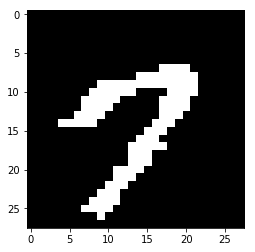

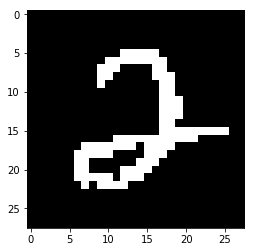

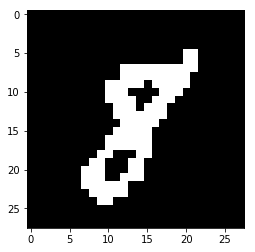

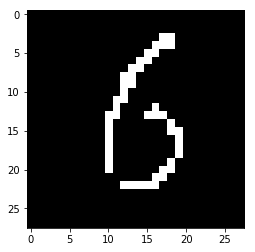

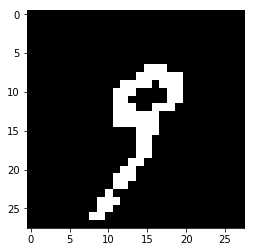

In [100]:
for i in range(20):
    plt.imshow(a[i].astype(np.float64),cmap='gray')
    plt.show() 

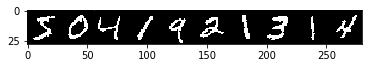

In [101]:
plt.imshow(big_img.astype(np.float64),cmap='gray')
plt.show() 